# Week 3
In several different resources, I read about using the Monte Carlo Simulation with geometric Brownian motion (GBM) to predict future stock prices.
I learned about the Monte Carlo Simulation in my AI class before so I thought it would be nice to revist it.
First I created a table of adjusted closing prices of the stocks that I observed last week

In [1]:
!pip install pandas_datareader

In [2]:
import pandas as pd
from pandas_datareader import data as wb
import numpy as np
import matplotlib.pyplot as mplt
import seaborn as sns
from scipy.stats import norm

symbols = ['AAPL','AMZN','FB','GOOGL','MSFT','ORCL','PYPL','TSLA']
data = pd.DataFrame()
for sym in symbols:
    data[sym] = wb.DataReader(sym, data_source = 'yahoo', start = '2020-12-1')['Adj Close']
data.head()

,AAPL,AMZN,FB,GOOGL,MSFT,ORCL,PYPL,TSLA
Date,,,,,,,,
2020-12-01,121.968094,3220.080078,286.549988,1795.359985,214.412720,57.848629,216.539993,584.760010
2020-12-02,122.325897,3203.530029,287.519989,1824.969971,213.579712,58.183472,212.559998,568.820007
2020-12-03,122.186745,3186.729980,281.850006,1821.839966,212.459106,58.370583,214.539993,593.380005
2020-12-04,121.500977,3162.580078,279.700012,1823.760010,212.578094,59.050110,217.770004,599.039978
2020-12-07,122.991783,3158.000000,285.579987,1817.030029,212.508667,58.892536,217.929993,641.760010


In [3]:
# data.info()

In [4]:
# data.tail()

Returns is the data table of daily logarithmic return

In [5]:
returns = data.pct_change()
returns.dropna(inplace=True)
returns.head()

,AAPL,AMZN,FB,GOOGL,MSFT,ORCL,PYPL,TSLA
Date,,,,,,,,
2020-12-02,0.002934,-0.005140,0.003385,0.016493,-0.003885,0.005788,-0.018380,-0.027259
2020-12-03,-0.001138,-0.005244,-0.019720,-0.001715,-0.005247,0.003216,0.009315,0.043177
2020-12-04,-0.005612,-0.007578,-0.007628,0.001054,0.000560,0.011642,0.015056,0.009539
2020-12-07,0.012270,-0.001448,0.021022,-0.003690,-0.000327,-0.002668,0.000735,0.071314
2020-12-08,0.005091,0.006108,-0.007634,-0.003137,0.008027,-0.012876,-0.004543,0.012653


I created a method for ploting the simulation so I can simply input the stock's ticker symbol into the method.
The simulation will create 20 trials predicting the stock price of the given stock's ticker symbol for the next 7 days.

In [6]:
def mcs(symbol):
    days = 7
    trials = 20

    mean = returns.mean()[symbol]
    var = returns.var()[symbol]
    std = returns.std()[symbol]
    drift = mean - (0.5*var)

    # generate random variables for every predicted day and for every trial
    Z = norm.ppf(np.random.rand(days, trials))
    daily_returns = np.exp(drift + std * Z)
    # print(Z)

    price_paths = np.zeros_like(daily_returns)
    # print(price_paths)
    # the starting price is the last price in the data table (the most recent adj closing price)
    price_paths[0] = data[symbol].iloc[-1]
    for t in range(1, days):
        # the predicted price for day t is the previous day's price + the estimated daily return for day t
        price_paths[t] = price_paths[t-1]*daily_returns[t]
    mplt.plot(price_paths)

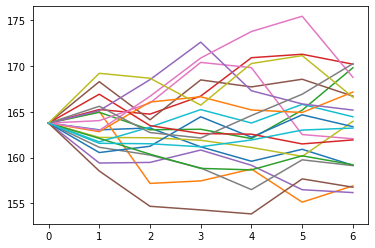

In [7]:
mcs('AAPL')

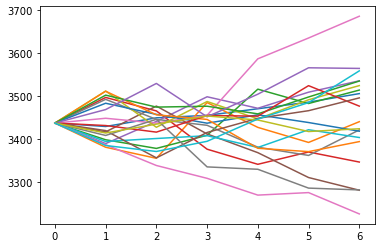

In [8]:
mcs('AMZN')

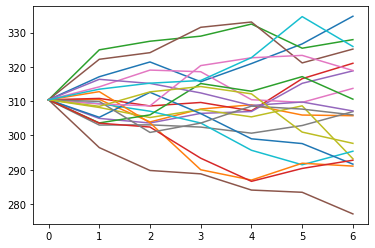

In [9]:
mcs('FB')

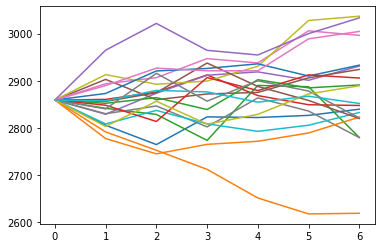

In [10]:
mcs('GOOGL')

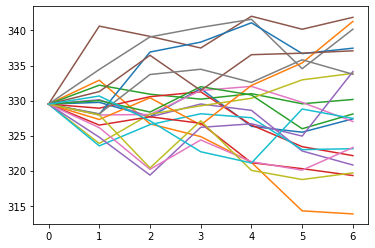

In [11]:
mcs('MSFT')

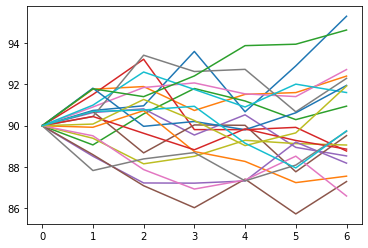

In [12]:
mcs('ORCL')

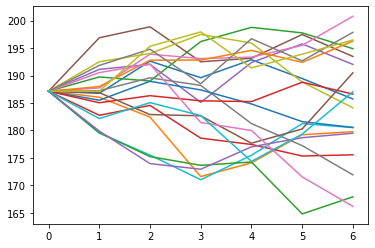

In [13]:
mcs('PYPL')

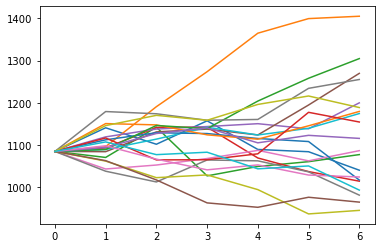

In [14]:
mcs('TSLA')

Based on the simulation results, it looks like AMZN, MSFT, ORCL, and PYPL tend to have higher prices after 7 days, so I will be investing in these companies for this week.

last week I invested in TSLA, FB, AAPL, and ORCL. In the simulation, TSLA, AAPL are predicted to have an increase in prices tomorrow so I will sell those stocks.